## EDA and Feature Selection

In [117]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set(style='whitegrid')

This dataset represent potentially habitable exoplanets. The catalog uses habitability metrics and classifications to compare exoplanets. 

The dataset includes stellar and planetary properties including, potentially habitable worlds are identified using the Orbit-Size Criteria, the snow line, tidal lock zone, abiogenesis zone, and habitable zone of each stellar system, surface temperature of planets estimated assuming a similar terrestrial atmosphere for comparison purposes, habitable zone (HZ) for planets in eccentric orbits, exoplanet classification by parent star stellar type, orbit, and size, physical properties of planets such as density, gravity, and escape velocity.

The catalog uses the NASA Exoplanet Archive as its main data source, but it adds corrections from other databases, or directly from papers.



Feature Selection will be performed on the training set only to avoid data leakage.

In [118]:
df = pd.read_csv('../data/processed/train_phl.csv')
df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_MASS,P_MASS_ORIGIN,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,...,S_LUMINOSITY,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,HABITABILITY
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,250.0000,Mass,13.90,NaN,3.4000,NaN,...,NaN,NaN,NaN,0.214133,0,0,NaN,0,NaN,0
1,Kepler-829 b,Transit,Kepler,2016,5.1000,M-R relationship,2.11,6.883376,0.0678,0.0000,...,1.096478,2.827247,1.756317,0.459559,0,0,Hot,0,0.254763,0
2,K2-283 b,Transit,K2,2018,12.2000,M-R relationship,3.52,1.921036,0.0291,NaN,...,0.299226,1.476943,0.568374,0.443760,0,0,Hot,0,0.193906,0
3,TOI-1260 c,Transit,Transiting Exoplanet Survey Satellite (TESS),2021,13.2000,Mass,2.76,7.493134,0.0657,0.0000,...,0.129122,0.970206,0.124210,0.431924,0,0,Hot,0,0.260440,0
4,HD 149143 b,Radial Velocity,Haute-Provence Observatory,2005,422.7139,Msini,13.60,4.071820,0.0530,0.0167,...,2.238721,4.039836,2.464949,0.484387,0,0,Hot,0,0.067319,0


In [119]:
df.shape

(3755, 47)

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_YEAR,3755.0,2.016284e+03,4.428134e+00,1.992000e+03,2014.000000,2016.000000,2020.000000,2.024000e+03
P_MASS,3749.0,4.148829e+02,2.071976e+03,2.000000e-02,4.040000,8.700000,152.550000,8.970000e+04
P_RADIUS,3749.0,5.682994e+00,5.349435e+00,3.100000e-01,1.770000,2.799000,11.747000,7.734200e+01
P_PERIOD,3588.0,1.168857e+05,6.713563e+06,2.197000e-01,4.396350,11.326107,40.061228,4.020000e+08
P_SEMI_MAJOR_AXIS,3754.0,7.274334e+00,1.550765e+02,5.538969e-03,0.052205,0.101000,0.274600,7.506000e+03
P_ECCENTRICITY,3217.0,7.767237e-02,1.524839e-01,0.000000e+00,0.000000,0.000000,0.090000,9.500000e-01
P_INCLINATION,2884.0,8.681040e+01,1.112234e+01,3.700000e-01,86.837500,88.740000,89.660000,1.760920e+02
P_OMEGA,1130.0,1.202752e+02,1.176483e+02,-1.856400e+02,31.044750,104.745000,207.480000,3.953410e+02
S_MAG,3609.0,1.261809e+01,3.110687e+00,8.720000e-01,10.777000,13.459000,14.993000,4.461000e+01
S_DISTANCE,3742.0,6.954246e+02,1.108830e+03,1.301190e+00,108.261500,405.318500,851.801250,8.500000e+03


The columns defining
the planet’s mass, radius, orbital period, and eccentricity, as well as the stellar object,
stellar radius, mass, metallicity, distance, earth similarity index, and surface temperature are crucial for habitability prediction.

In [121]:
features = ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
            'S_MASS', 'S_RADIUS', 'S_TEMPERATURE', 'S_DISTANCE', 'S_METALLICITY',
            'P_ESI', 'P_TEMP_SURF']
target = 'HABITABILITY'
group_col = 'S_NAME'

We consider engineered features from the columns to compare the resutls and pick the best features for model training.

In [122]:
# Engineered Features
engineered_features = ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
            'S_MASS', 'S_RADIUS', 'S_TEMPERATURE', 'S_DISTANCE', 'S_METALLICITY',
            'S_LUMINOSITY', 'P_SEMI_MAJOR_AXIS',
            'P_GRAVITY', 'P_FLUX', 'S_TIDAL_LOCK']

### Histogram plots of the crutial features:

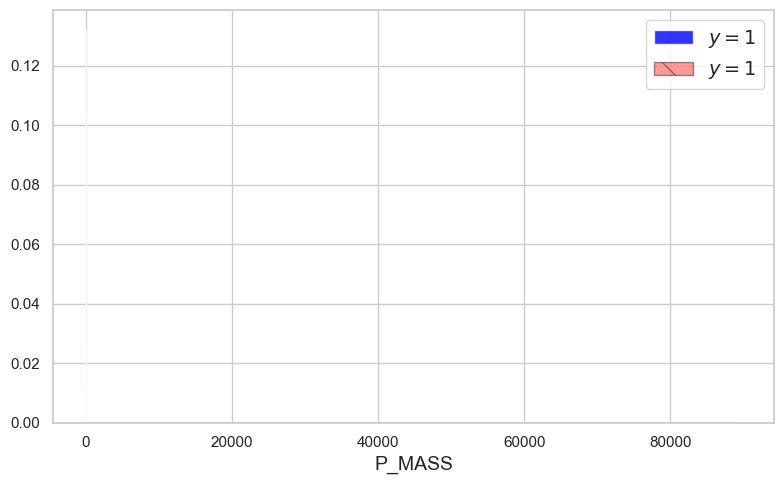

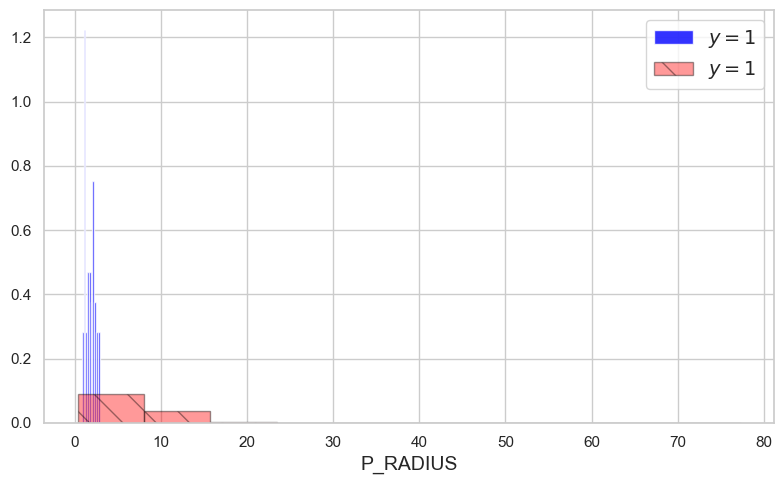

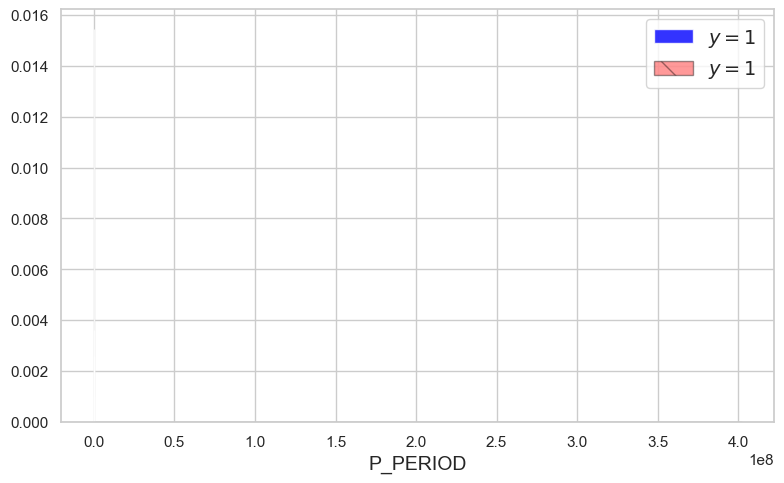

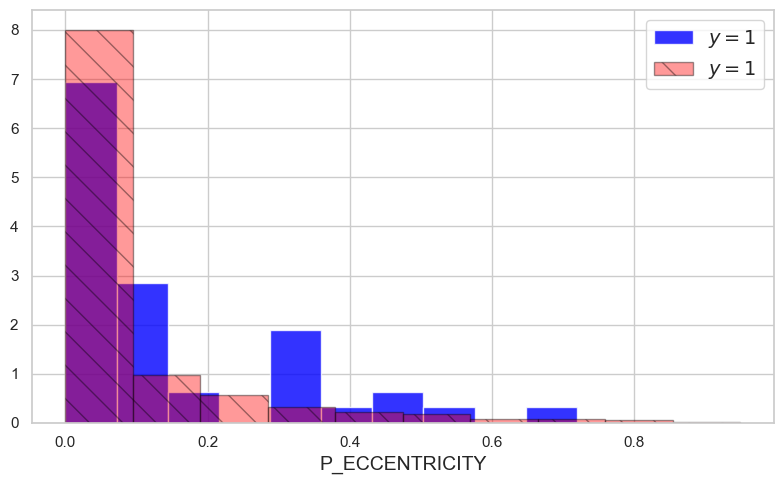

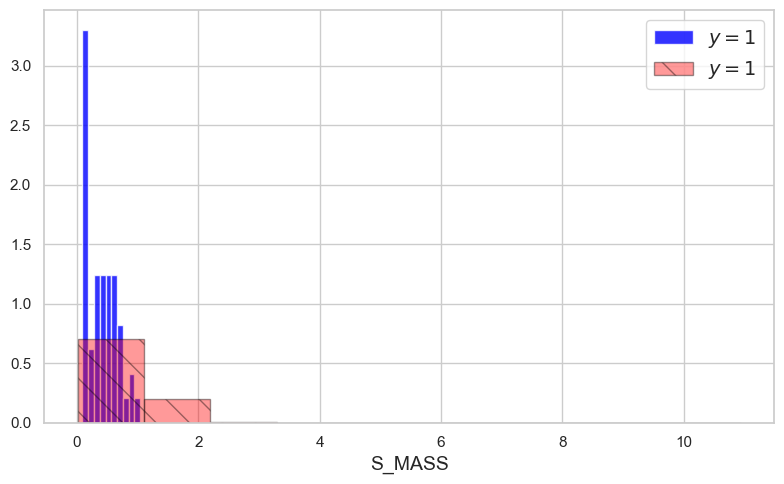

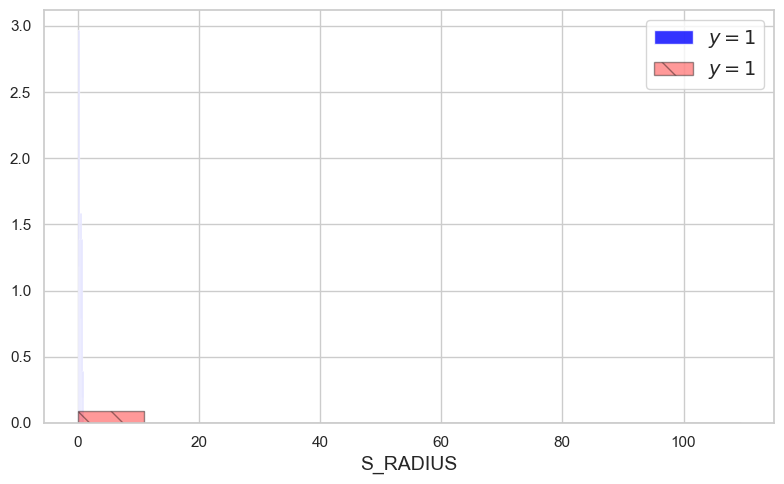

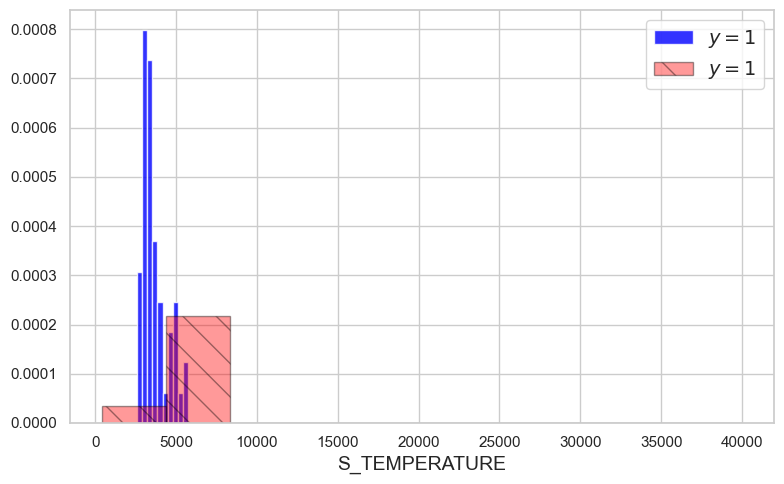

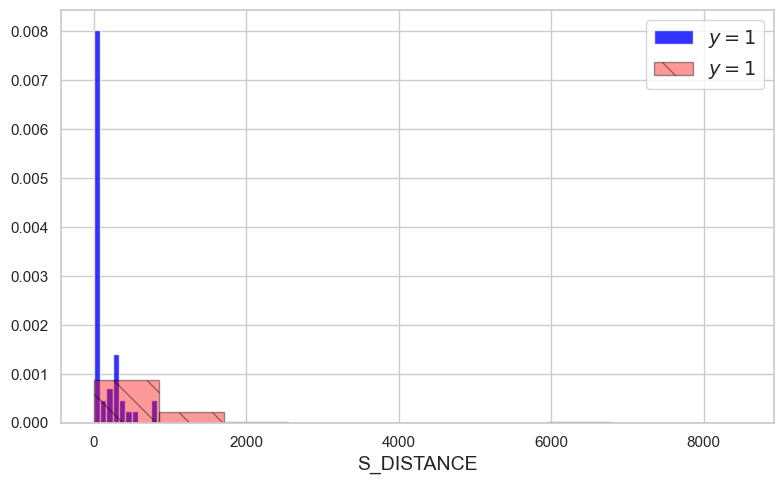

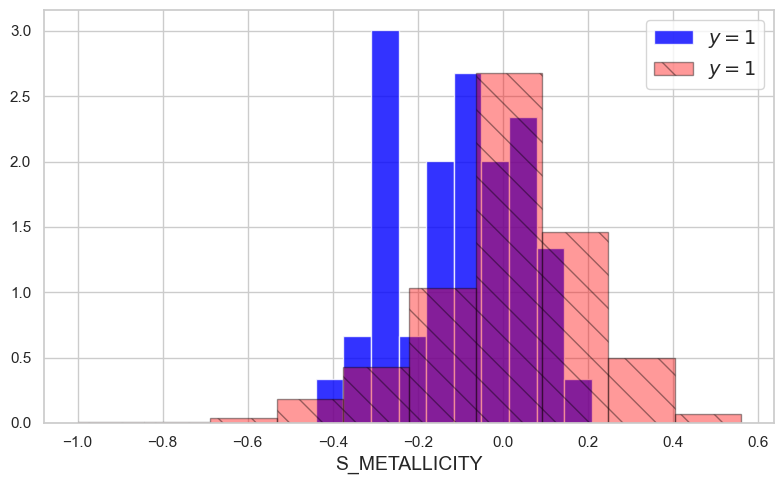

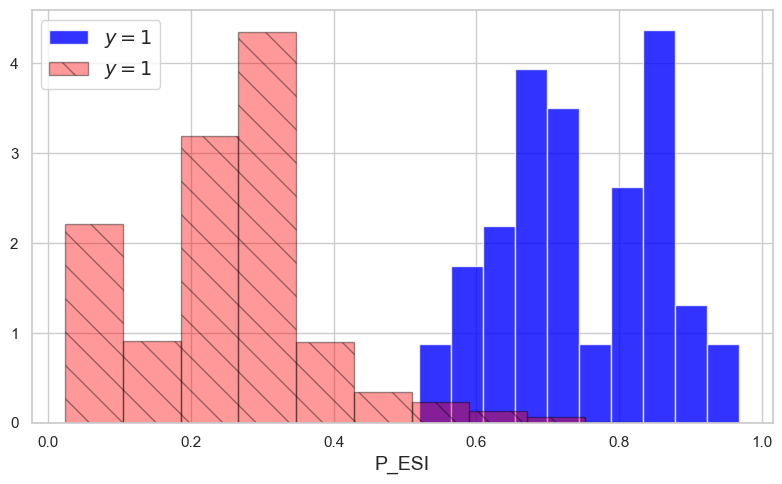

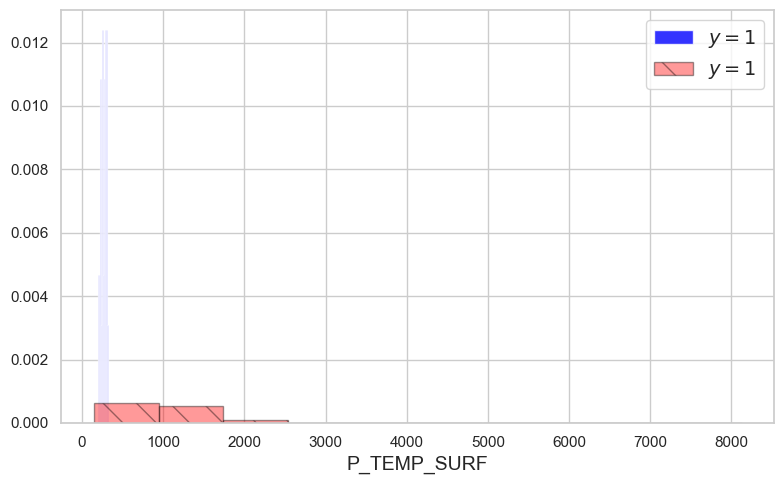

In [123]:
for col in features:
    habitable = df[df[target]==1][col].dropna()
    non_habitable = df[df[target]==0][col].dropna()

    plt.figure(figsize=(8,5))
    plt.hist(habitable, color='blue', alpha=0.8, label='$y=1$', density=True)
    plt.hist(non_habitable, color='red', alpha=0.4, hatch='\\', 
             edgecolor='black', label="$y=1$", density=True)
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


Among all the features the P_ESI, P_TEMP_SURF are the most informative features for categorizing planets based on habitability (as expected).

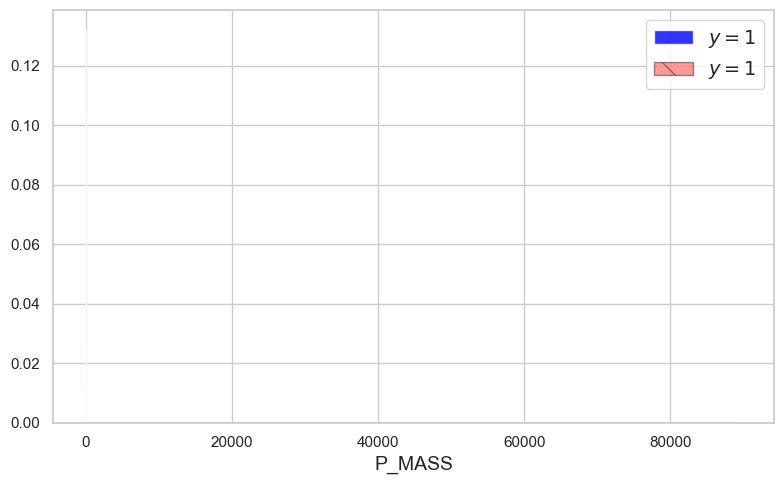

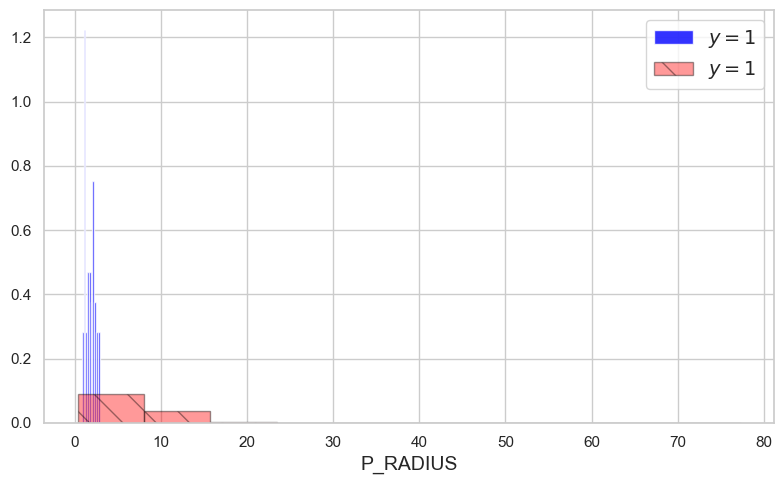

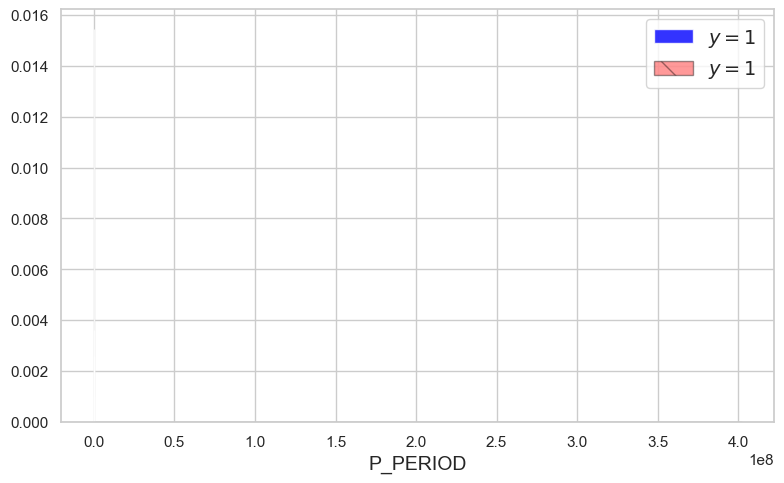

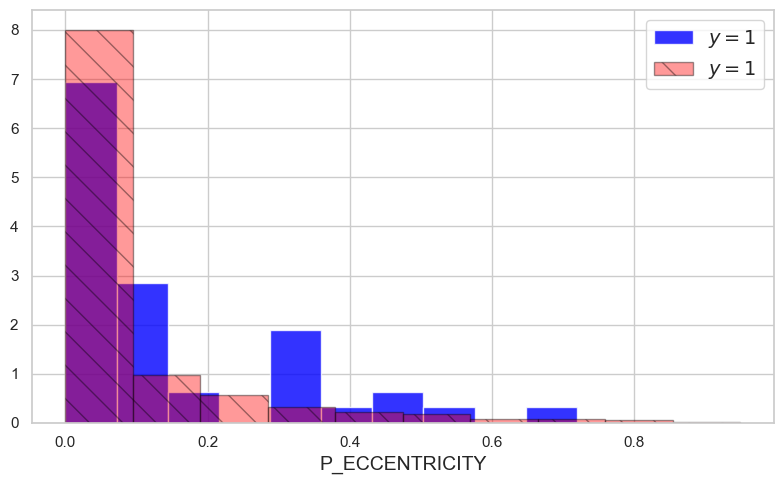

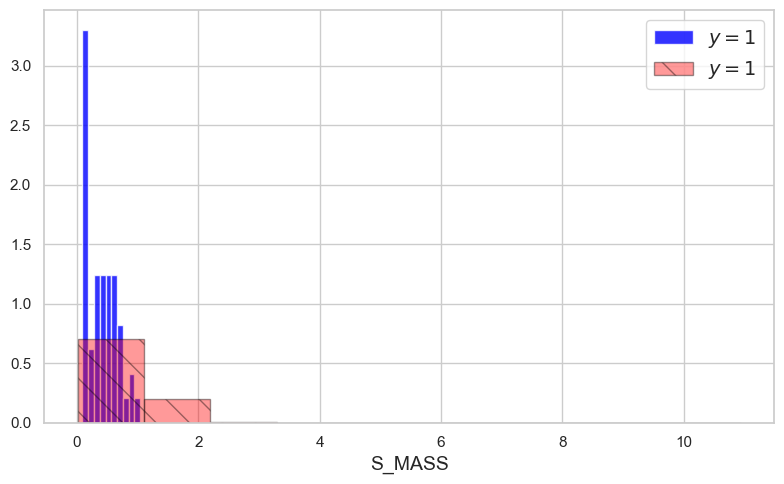

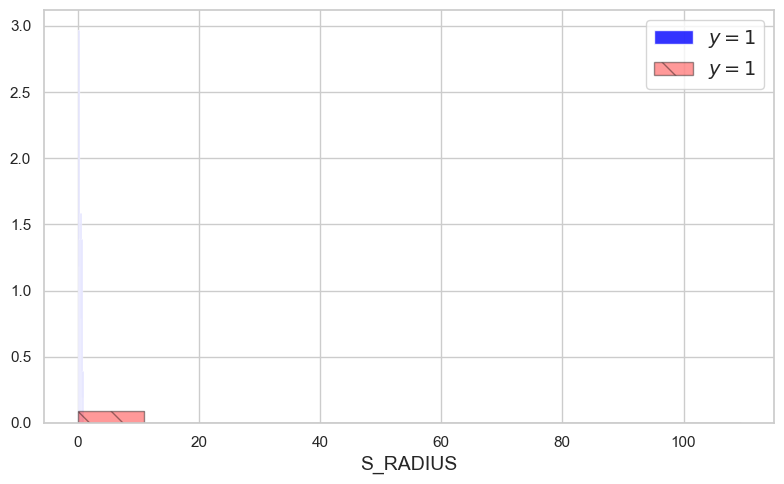

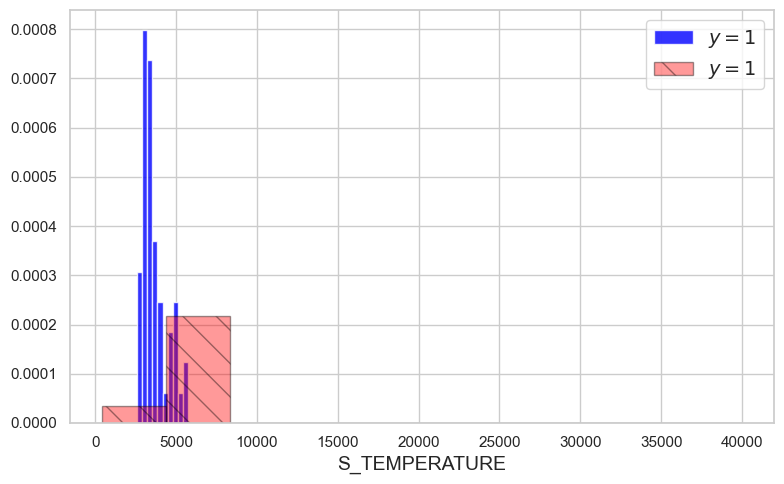

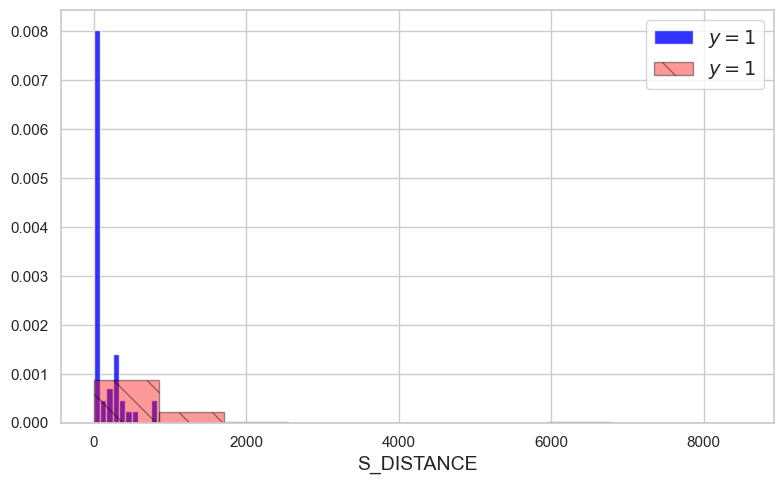

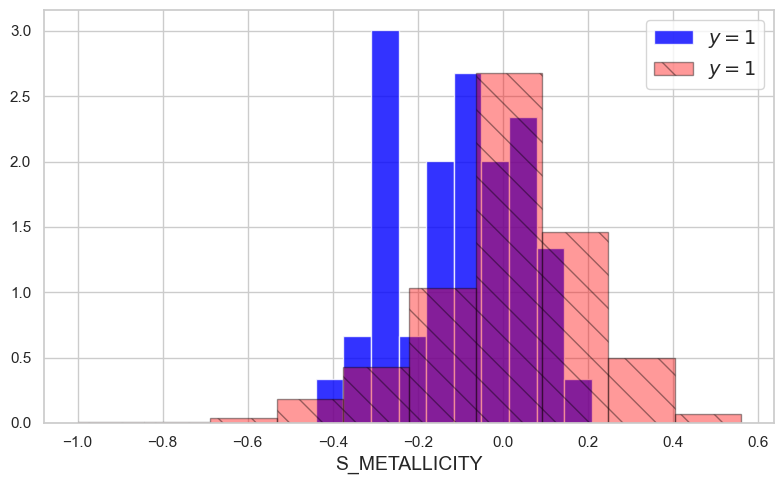

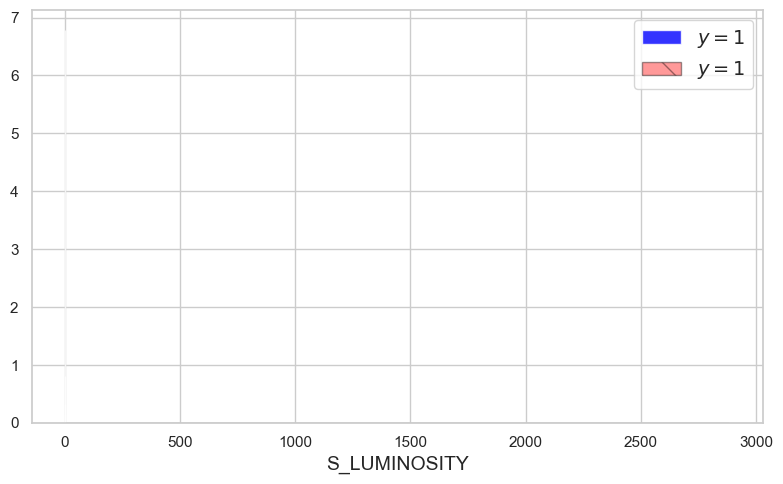

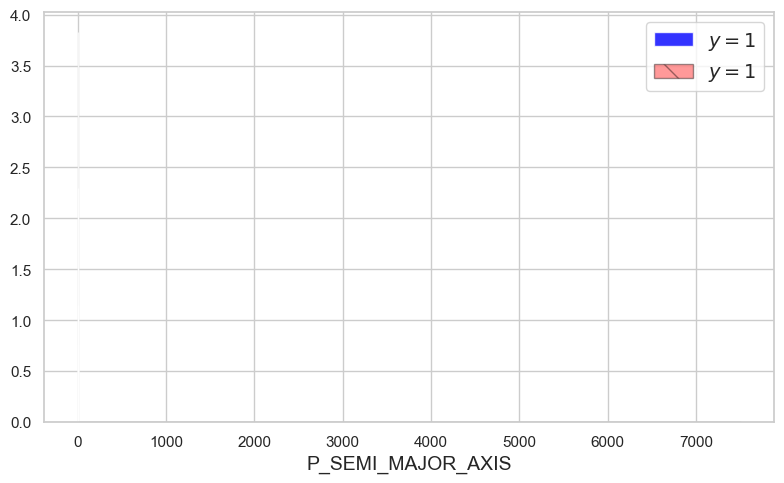

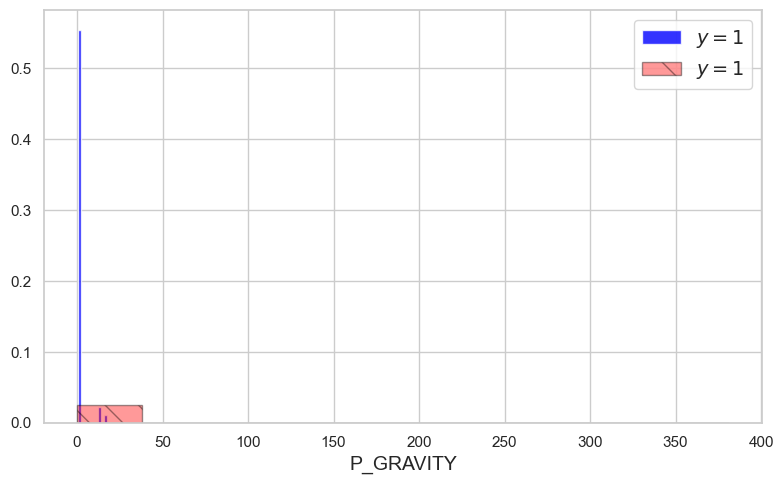

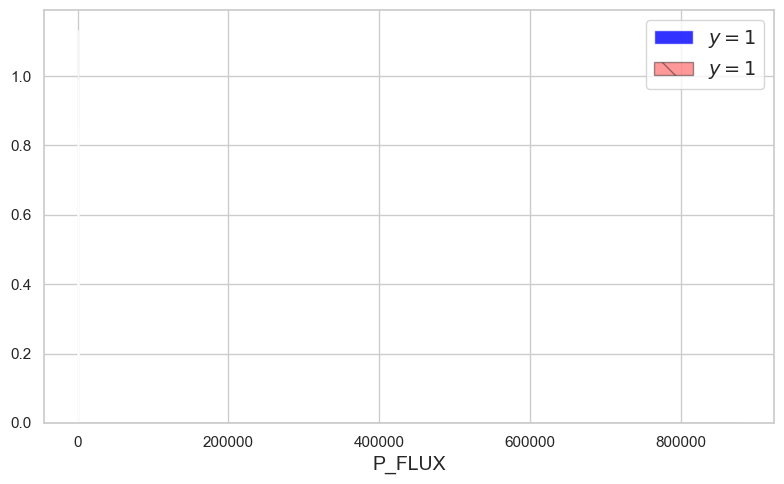

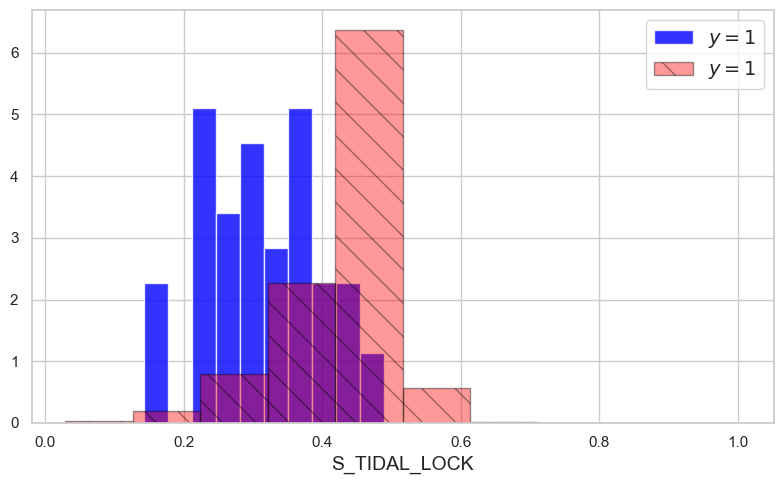

In [124]:
for col in engineered_features:
    habitable = df[df[target]==1][col].dropna()
    non_habitable = df[df[target]==0][col].dropna()

    plt.figure(figsize=(8,5))
    plt.hist(habitable, color='blue', alpha=0.8, label='$y=1$', density=True)
    plt.hist(non_habitable, color='red', alpha=0.4, hatch='\\', 
             edgecolor='black', label="$y=1$", density=True)
    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


We cannot judge the importance of the features only based on the histogram plots. 

Next steps:
- Statistic tests such as mutual information checks.
- Try model-based feature importance selection.
- dimentionality reduction in the features (PCA)

In [125]:
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [126]:
# A function to calculate the baseline score
models = {
    'logistic regression' : LogisticRegression(max_iter=1000, random_state=42),
    'random forest' : RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'XGboosting': XGBClassifier(random_state=42)
}

def base_score(X, y, model=models):
    for col in X.select_dtypes('object'):
        X[col] = X[col].astype('category').cat.codes

    cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    model_scores = {}
    scores = {}

    for model_name, model in model.items():
        #roc_auc = cross_val_score(model, X, y, cv=cv, scoring = 'roc_auc').mean()
        f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
        #precision = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
        #recall = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()

        model_scores[model_name] = {
            #'roc_auc' : roc_auc, 
            'f1' : f1,
            #'precision' : precision,
            #'recall' : recall
        }


    #avg_roc_auc = np.mean([m['roc_auc'] for m in model_scores.values()])
    avg_f1 = np.mean([m['f1'] for m in model_scores.values()])
    scores['model_performance'] = model_scores
    #scores['avg_roc_auc'] = avg_roc_auc
    scores['avg_f1'] = avg_f1

    return scores

In [127]:
data = df.copy()

for col in data.select_dtypes('number'):
    data[col] = data[col].fillna(0)
for col in data.select_dtypes('object'):
    data[col] = data[col].fillna('None')

X = data[features]
y = data[target]
random_state = 42

X_hat = data[engineered_features]

In [128]:
# baseline score

baseline_scores = base_score(X, y, models)
print(f'Baseline scores: {baseline_scores}')

Baseline scores: {'model_performance': {'logistic regression': {'f1': np.float64(0.5173160173160173)}, 'random forest': {'f1': np.float64(0.8642241379310344)}, 'XGboosting': {'f1': np.float64(0.9601731601731602)}}, 'avg_f1': np.float64(0.7805711051400707)}


### Features with mutual information

In [129]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=random_state)
mi_df = pd.DataFrame({
    'features': X.columns,
    'mutual information scores': mi_scores
}).sort_values(by='mutual information scores', ascending=False)
mi_df

,features,mutual information scores
10,P_TEMP_SURF,0.069742
9,P_ESI,0.052804
6,S_TEMPERATURE,0.024140
4,S_MASS,0.021428
5,S_RADIUS,0.021125
7,S_DISTANCE,0.016834
0,P_MASS,0.009057
1,P_RADIUS,0.008071
2,P_PERIOD,0.007014
8,S_METALLICITY,0.005083


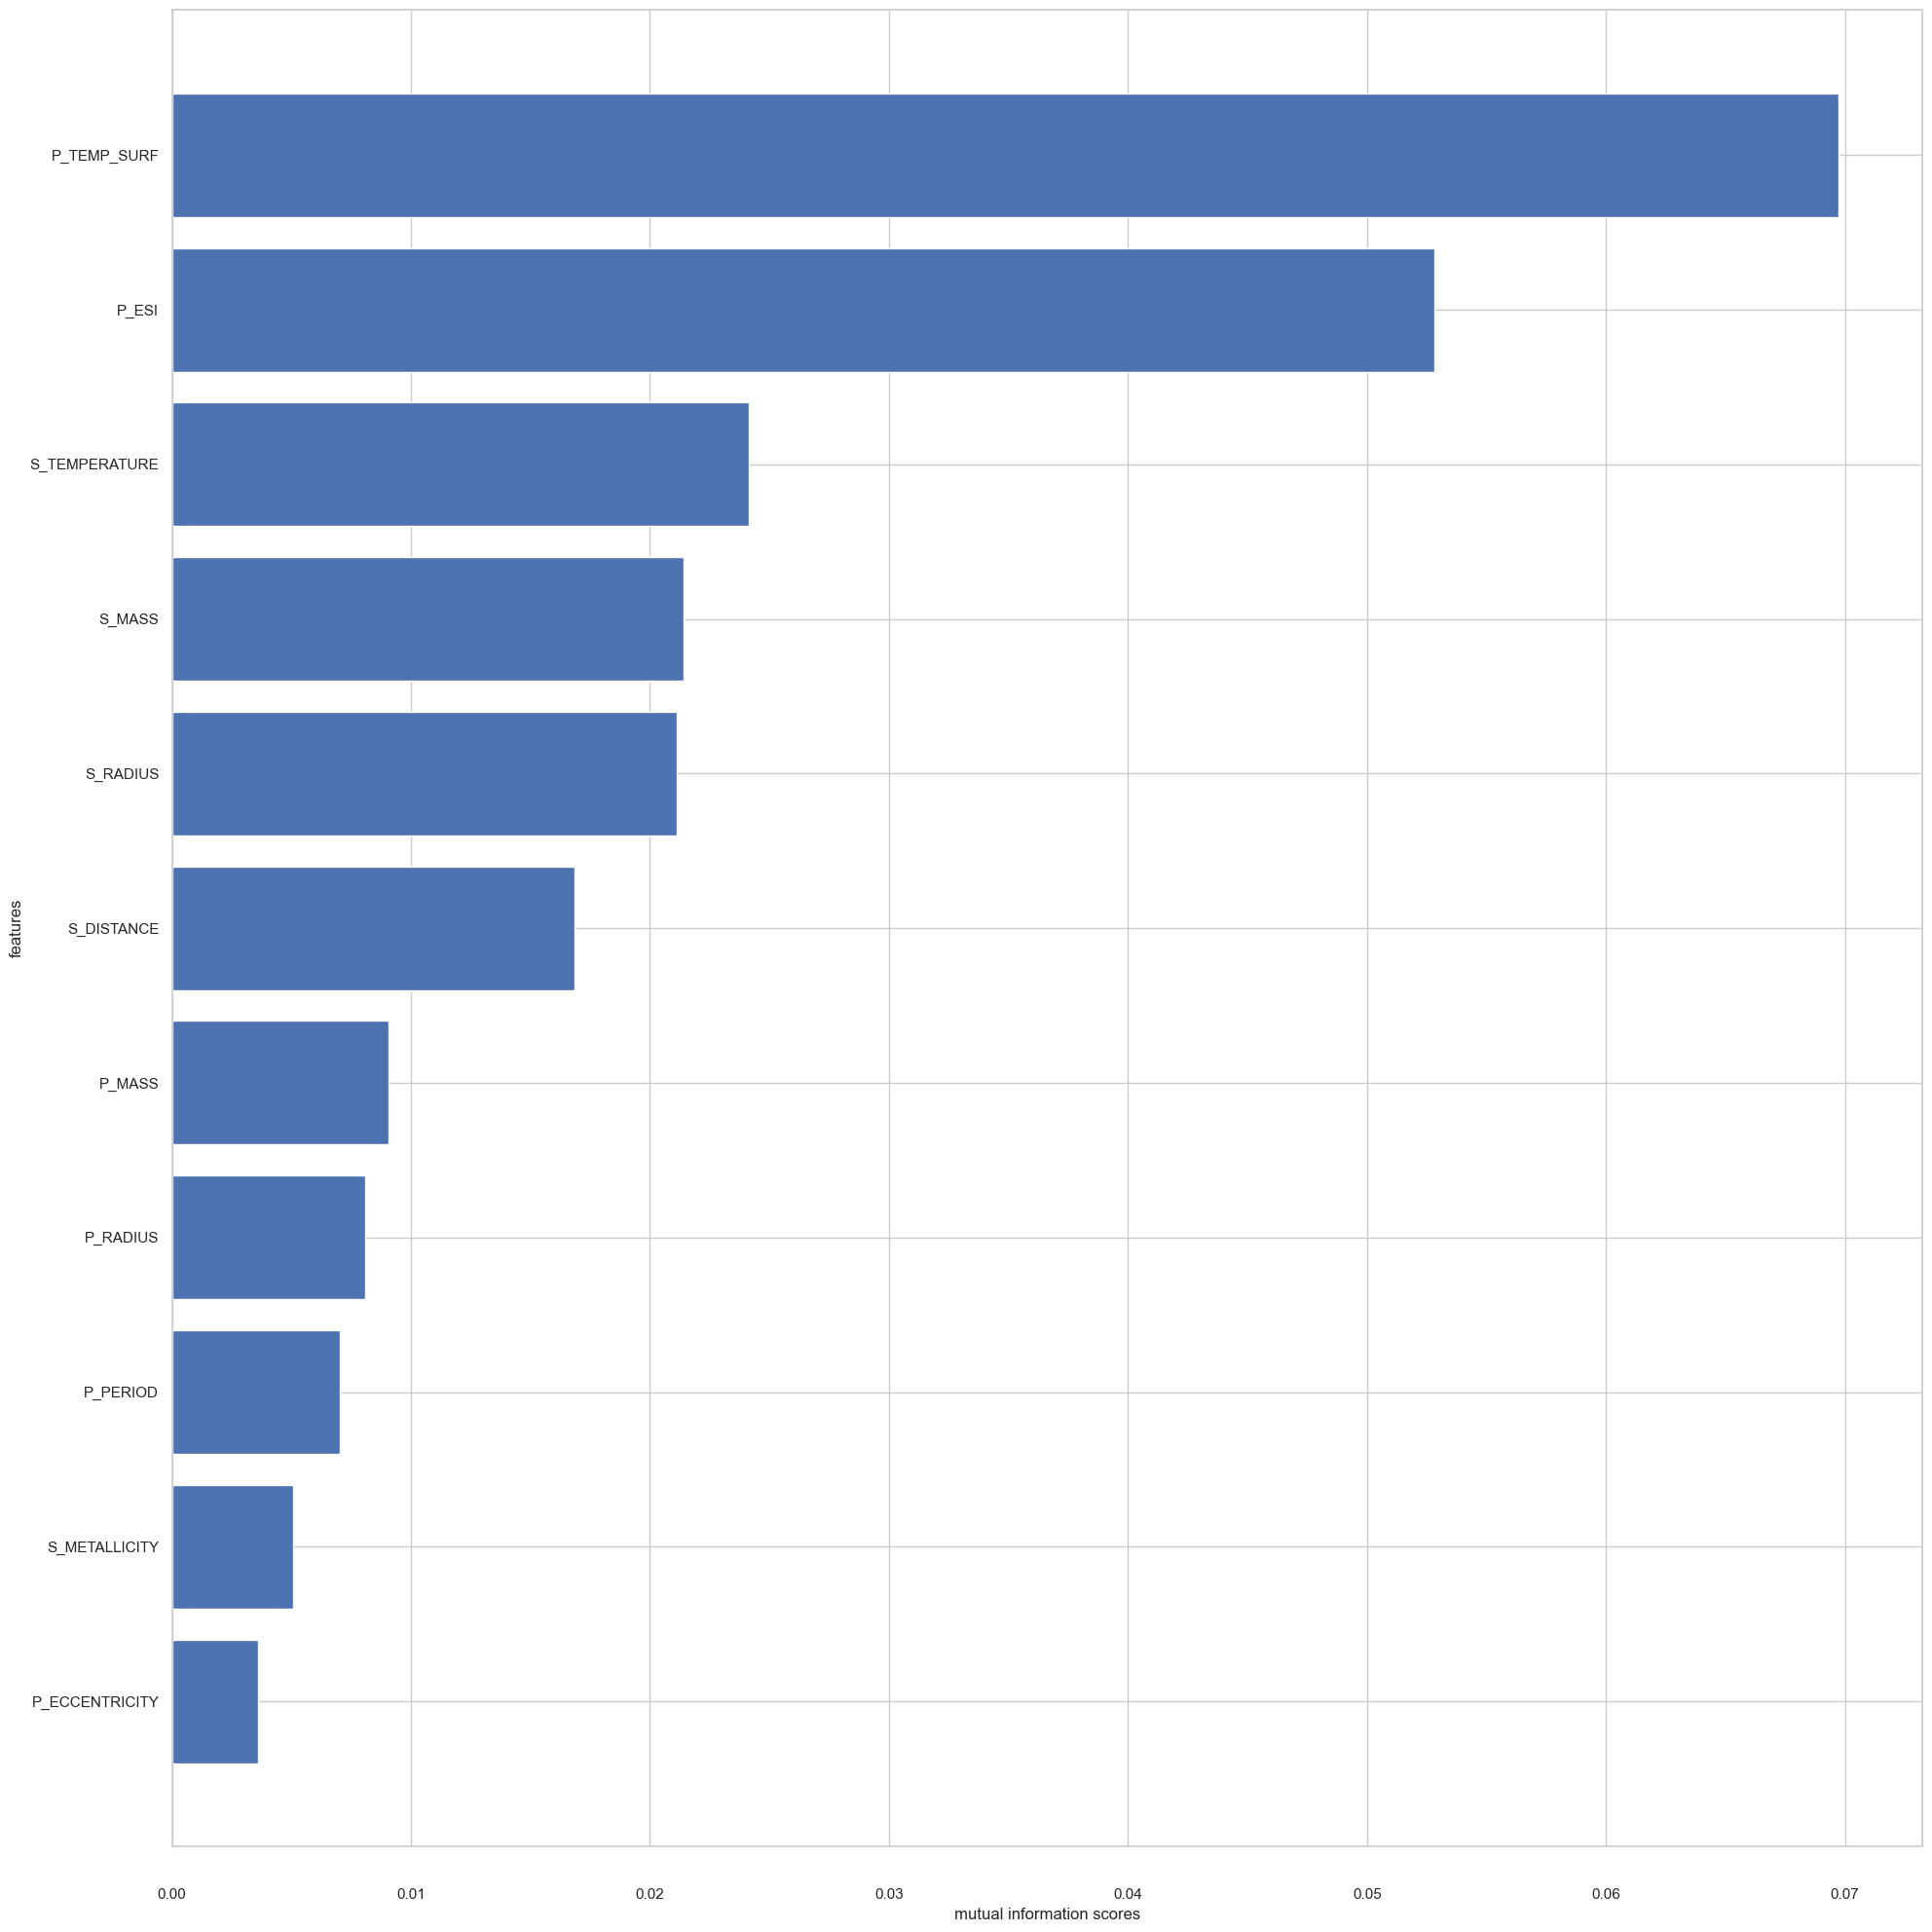

In [130]:
mi_df = mi_df.sort_values(by='mutual information scores', ascending=True)
plt.figure(figsize=(20,20))
plt.barh(mi_df['features'], mi_df['mutual information scores'])
plt.xlabel('mutual information scores')
plt.ylabel('features')
plt.tick_params(axis='x', pad=25)
plt.tight_layout()
plt.show()

### Mutual Information for Engineered Features

In [131]:
mi_scores = mutual_info_classif(X_hat, y, random_state=random_state)
mi_df = pd.DataFrame({
    'features': X_hat.columns,
    'mutual information scores': mi_scores
}).sort_values(by='mutual information scores', ascending=False)
mi_df

,features,mutual information scores
12,P_FLUX,0.042834
9,S_LUMINOSITY,0.028309
6,S_TEMPERATURE,0.023686
5,S_RADIUS,0.021992
4,S_MASS,0.021261
13,S_TIDAL_LOCK,0.016677
7,S_DISTANCE,0.016477
0,P_MASS,0.011145
1,P_RADIUS,0.008476
2,P_PERIOD,0.006924


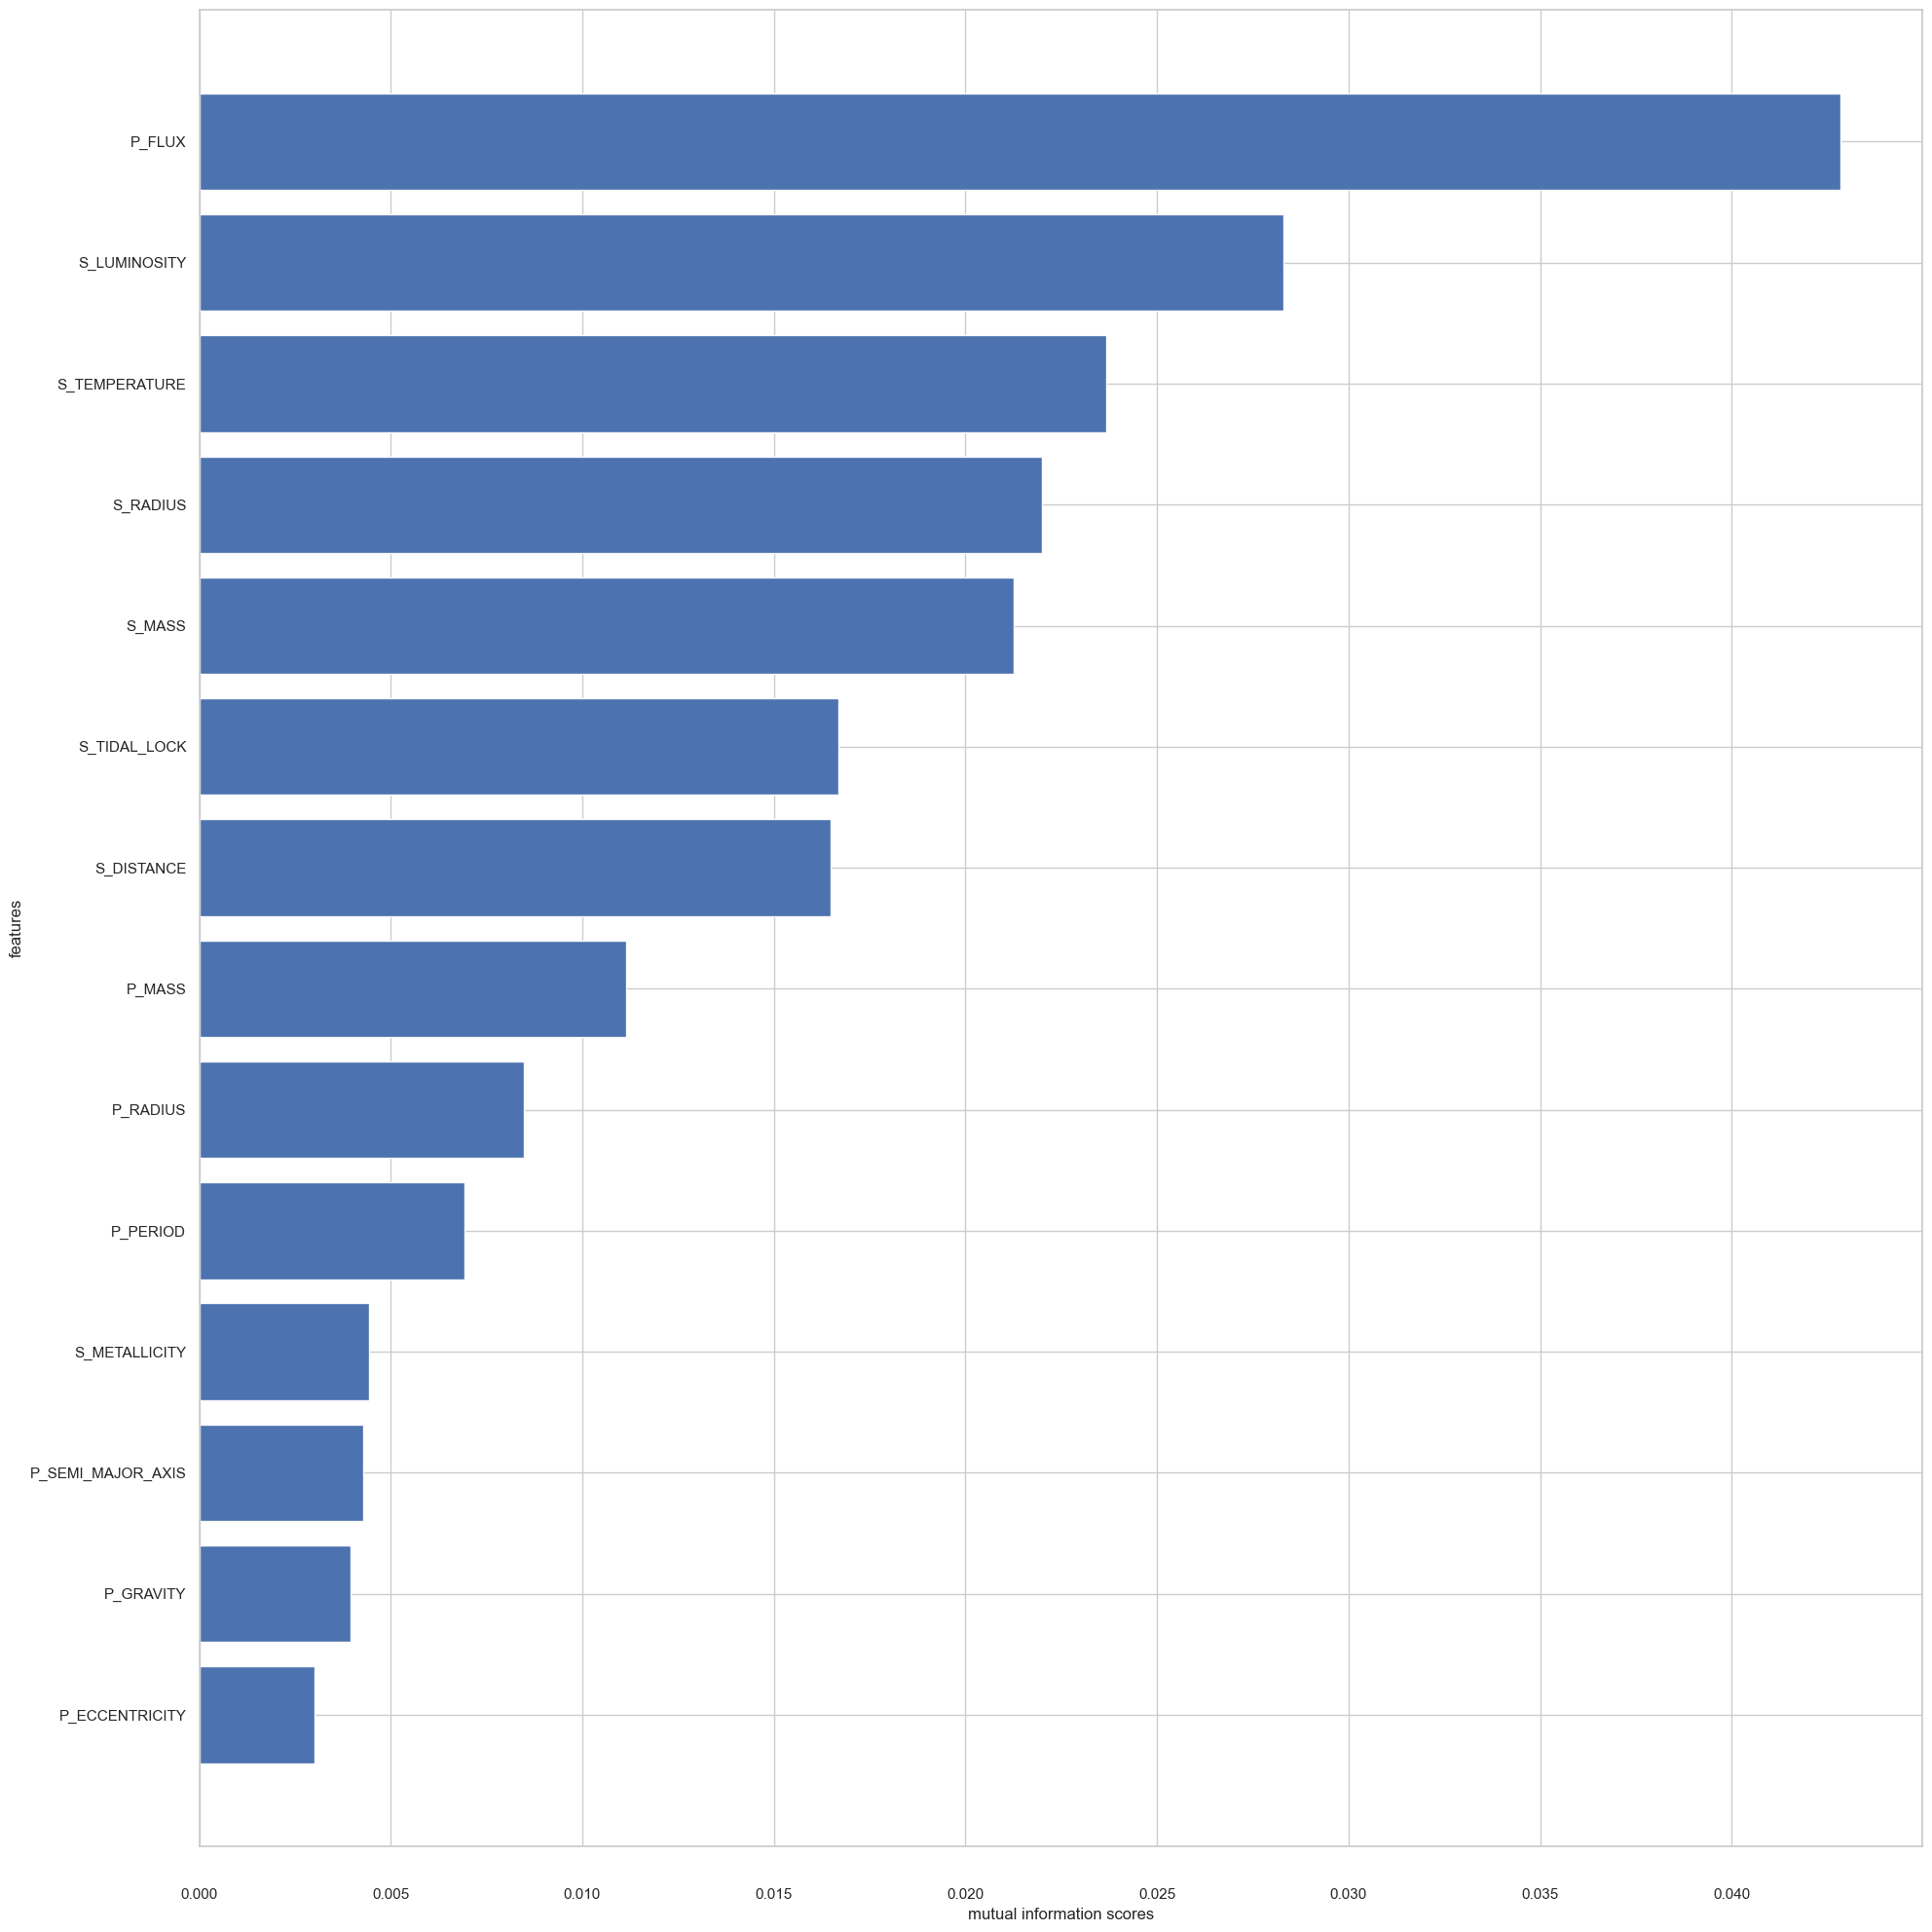

In [132]:
mi_df = mi_df.sort_values(by='mutual information scores', ascending=True)
plt.figure(figsize=(20,20))
plt.barh(mi_df['features'], mi_df['mutual information scores'])
plt.xlabel('mutual information scores')
plt.ylabel('features')
plt.tick_params(axis='x', pad=25)
plt.tight_layout()
plt.show()

### Mutual information for all the features

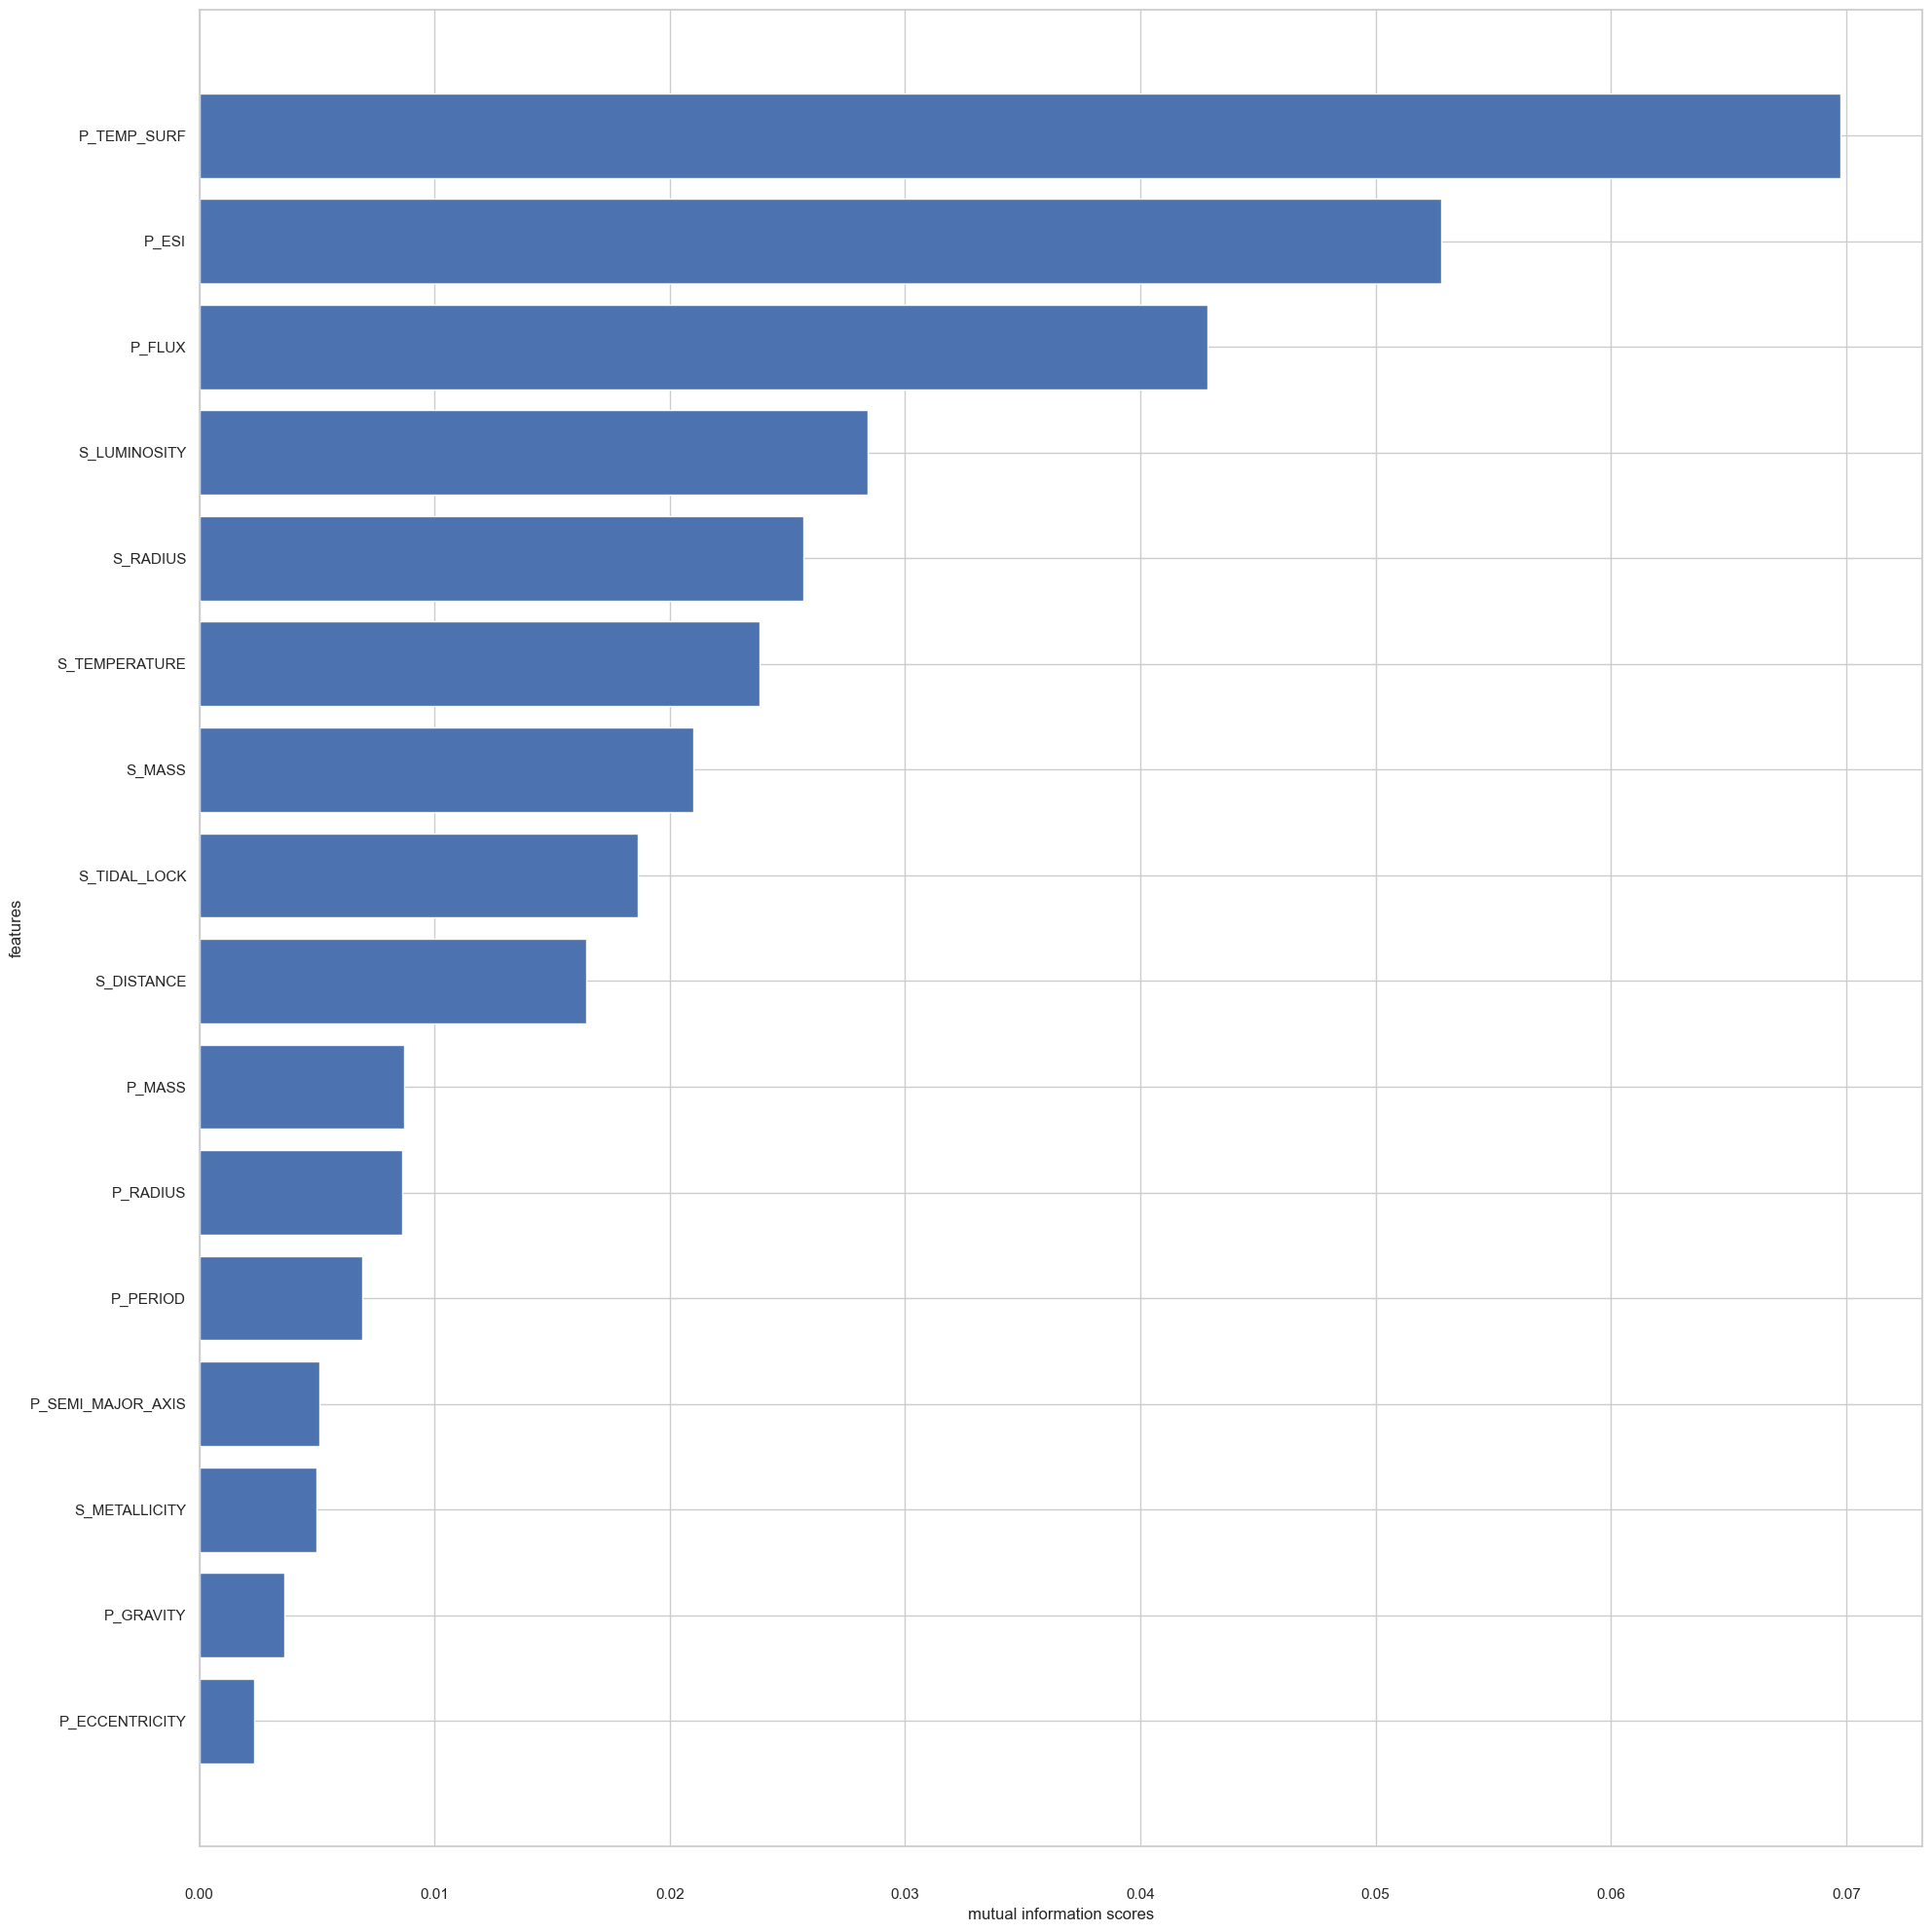

In [133]:
all_features = ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
            'S_MASS', 'S_RADIUS', 'S_TEMPERATURE', 'S_DISTANCE', 'S_METALLICITY',
            'P_ESI', 'P_TEMP_SURF', 'S_LUMINOSITY', 'P_SEMI_MAJOR_AXIS',
            'P_GRAVITY', 'P_FLUX', 'S_TIDAL_LOCK']
X_all = data[all_features]
mi_scores = mutual_info_classif(X_all, y, random_state=random_state)
mi_df = pd.DataFrame({
    'features': X_all.columns,
    'mutual information scores': mi_scores
}).sort_values(by='mutual information scores', ascending=False)
mi_df = mi_df.sort_values(by='mutual information scores', ascending=True)
plt.figure(figsize=(20,20))
plt.barh(mi_df['features'], mi_df['mutual information scores'])
plt.xlabel('mutual information scores')
plt.ylabel('features')
plt.tick_params(axis='x', pad=25)
plt.tight_layout()
plt.show()

### Function for Feature Transformation

In [134]:
def pca(X, standardize=True):
    if standardize:
        X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
    pca = PCA(n_components=0.95, random_state=0)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=[f'PCA_{i}' for i in range(X_pca.shape[1])])
    loadings = pd.DataFrame(pca.components_.T, columns=X_pca.columns, index=X.columns)
    return  X_pca

In [135]:
X = data[features]
X = pca(X)
y = data['HABITABILITY']

for col in X.select_dtypes('number'):
    X[col] = X[col].fillna(0)
for col in X.select_dtypes('object'):
    X[col] = X[col].fillna('None')

print(f'scores after using pca of features: {base_score(X, y)}')

scores after using pca of features: {'model_performance': {'logistic regression': {'f1': np.float64(0.603942652329749)}, 'random forest': {'f1': np.float64(0.6092857142857143)}, 'XGboosting': {'f1': np.float64(0.5539704160393816)}}, 'avg_f1': np.float64(0.5890662608849483)}


The base scores got worse when using PCA.

### Feature Importance

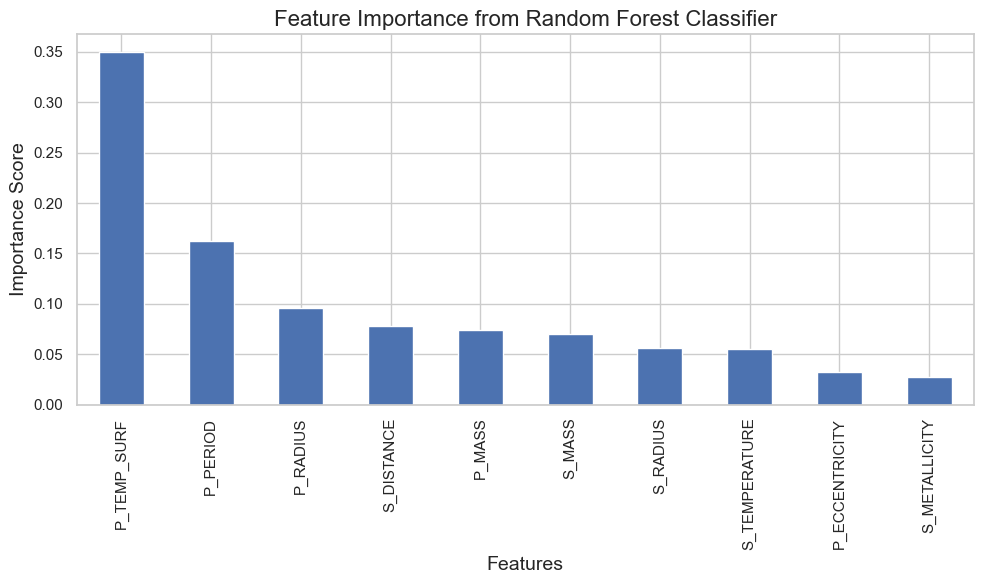

In [141]:
features = ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
            'S_MASS', 'S_RADIUS', 'S_TEMPERATURE', 'S_DISTANCE', 
            'S_METALLICITY', 'P_TEMP_SURF']
target = 'HABITABILITY'

X = data[features]
y = data[target]

rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_model.fit(X, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from Random Forest Classifier', fontsize=16)
plt.ylabel('Importance Score', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

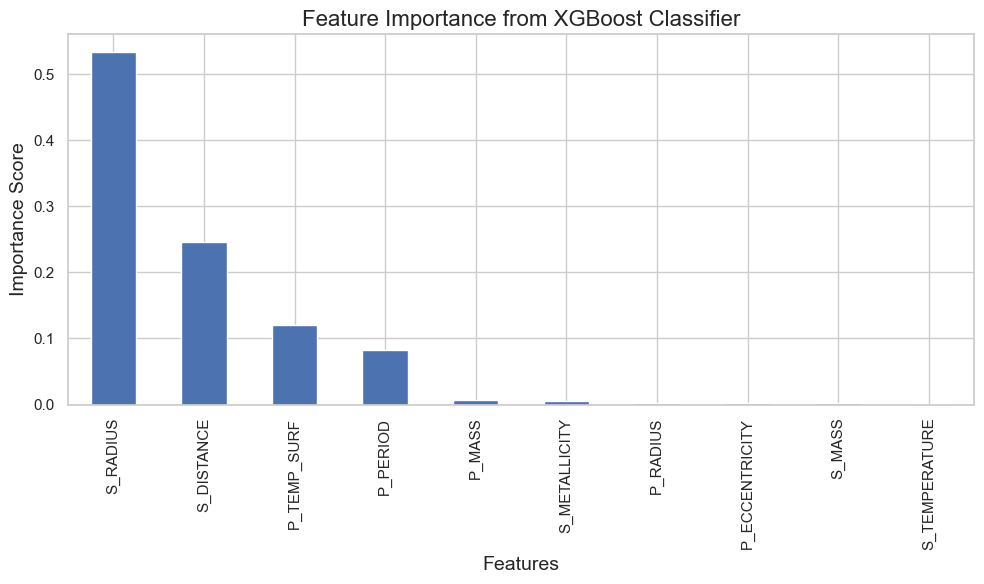

In [140]:
xgb_model = XGBClassifier(random_state=random_state)
xgb_model.fit(X, y)
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from XGBoost Classifier', fontsize=16)
plt.ylabel('Importance Score', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show() 

### Feature Importance for the Engineered Features:

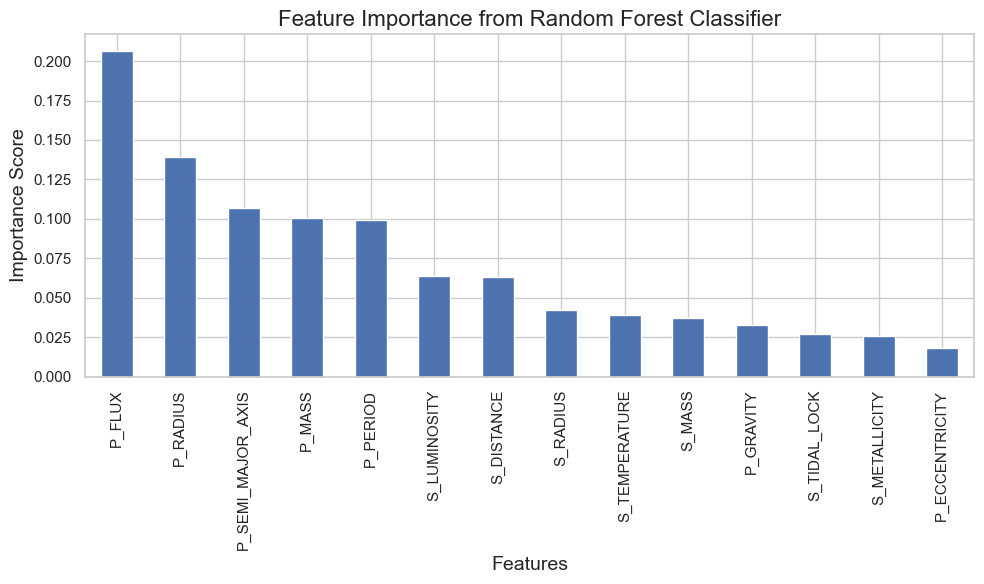

In [138]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_model.fit(X_hat, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X_hat.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from Random Forest Classifier', fontsize=16)
plt.ylabel('Importance Score', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

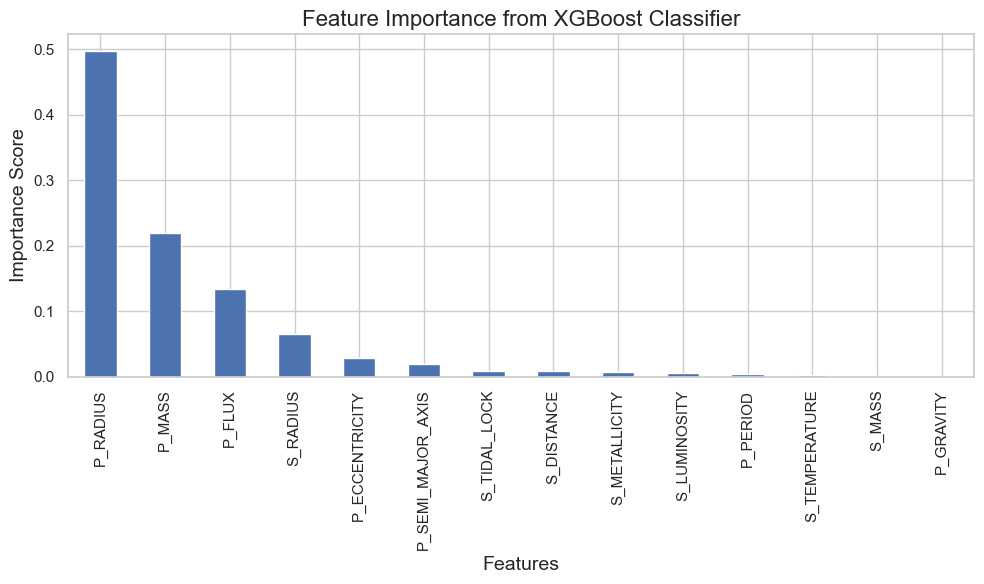

In [139]:
xgb_model = XGBClassifier(random_state=random_state)
xgb_model.fit(X_hat, y)
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_hat.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance from XGBoost Classifier', fontsize=16)
plt.ylabel('Importance Score', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show() 

### Check Feature Correlation with Habitability

In [150]:
corr_matrix = X_hat.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(column, row, upper_triangle.loc[row, column]) 
                    for column in upper_triangle.columns 
                    for row in upper_triangle.index 
                    if upper_triangle.loc[row, column] > 0.6]

scores = {}
scores['high_correlation_pairs'] = len(high_corr_pairs)
scores['multicollinearity_ratio'] = len(high_corr_pairs) / (len(X_hat.columns) * (len(X_hat.columns) - 1) / 2)
scores

{'high_correlation_pairs': 2, 'multicollinearity_ratio': 0.02197802197802198}

In [151]:
high_corr_pairs

[('S_LUMINOSITY', 'S_RADIUS', np.float64(0.8859691158449967)),
 ('P_SEMI_MAJOR_AXIS', 'P_PERIOD', np.float64(0.7900064821900447))]

In [144]:
features.append(target)
data = df[features]
corr_df = data.corr()[[target]].drop(index=[target])
corr_df['abs_corr'] = corr_df[target].abs()
corr_df = corr_df.sort_values(by='abs_corr', ascending=False)
corr_df

,HABITABILITY,abs_corr
P_TEMP_SURF,-0.252401,0.252401
S_MASS,-0.158840,0.158840
S_TEMPERATURE,-0.125229,0.125229
P_RADIUS,-0.087128,0.087128
S_METALLICITY,-0.071836,0.071836
S_DISTANCE,-0.059856,0.059856
P_ECCENTRICITY,0.047011,0.047011
S_RADIUS,-0.030765,0.030765
P_MASS,-0.023201,0.023201
P_PERIOD,-0.002090,0.002090


In [146]:
engineered_features.append(target)
data = df[engineered_features]
corr_df = data.corr()[[target]].drop(index=[target])
corr_df['abs_corr'] = corr_df[target].abs()
corr_df = corr_df.sort_values(by='abs_corr', ascending=False)
corr_df

,HABITABILITY,abs_corr
S_TIDAL_LOCK,-0.175330,0.175330
S_MASS,-0.158840,0.158840
S_TEMPERATURE,-0.125229,0.125229
P_RADIUS,-0.087128,0.087128
S_METALLICITY,-0.071836,0.071836
S_DISTANCE,-0.059856,0.059856
P_ECCENTRICITY,0.047011,0.047011
S_RADIUS,-0.030765,0.030765
P_MASS,-0.023201,0.023201
P_GRAVITY,-0.016764,0.016764


In [63]:
# Chack for duplicates

num_duplicates = data.duplicated().sum()
num_duplicates

np.int64(0)

In [64]:
# Check for duplicates excluding the target column
target = "HABITABILITY"
num_partial_dup = data.duplicated(subset=[c for c in data.columns if c!=target]).sum()
num_partial_dup

np.int64(0)

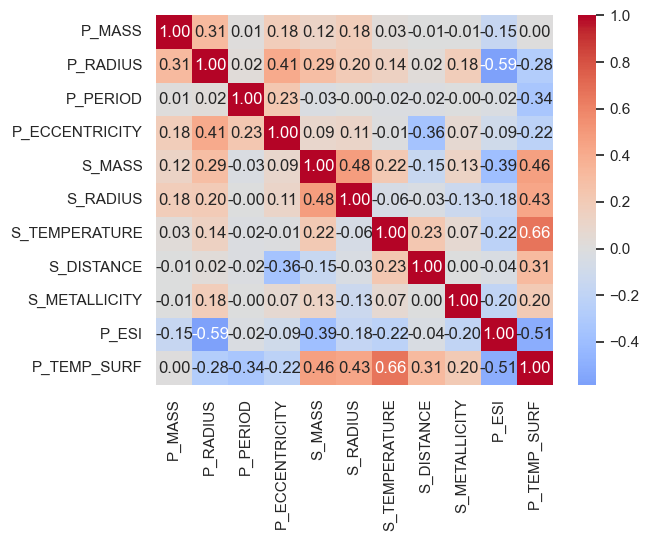

In [147]:
features = ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 
            'S_MASS', 'S_RADIUS', 'S_TEMPERATURE', 'S_DISTANCE', 'S_METALLICITY',
            'P_ESI', 'P_TEMP_SURF']
for col in data.select_dtypes('number'):
    data[col] = data[col].fillna(0)
for col in data.select_dtypes('object'):
    data[col] = data[col].fillna('None')

X = df[features]
y = df[target]

#  Check for multicollinearity
correlation_matrix = X[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

# Identify highly correlated features (>0.8)
high_corr = correlation_matrix.abs() > 0.8
high_corr = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool))

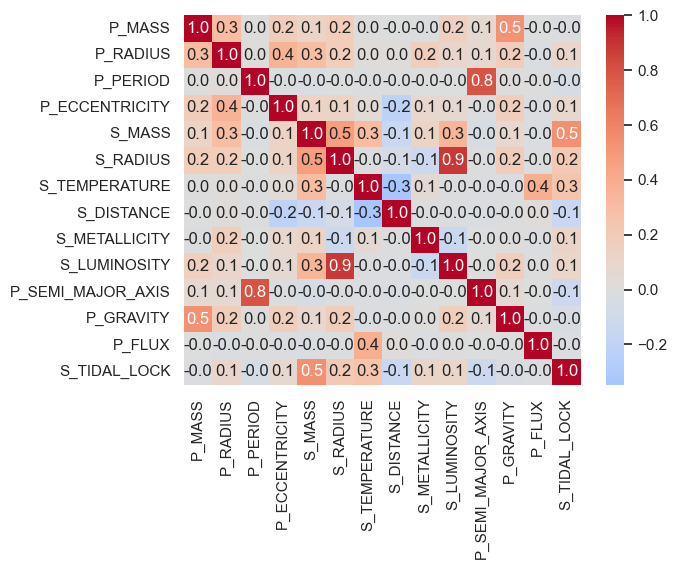

In [148]:
#  Check for multicollinearity
correlation_matrix = X_hat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".1f")

# Identify highly correlated features (>0.8)
high_corr = correlation_matrix.abs() > 0.8
high_corr = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool))

'P_PERIOD'_ 'P_SEMI_MAJOR_AXIS', 'S_LUMINOSITY' _'S_RADIUS' are highly correlated pairs. To avoid multicolinearity we only keep one.

Final features to consider:
engineered_features = ['P_MASS', 'P_RADIUS', 'P_ECCENTRICITY', 'S_MASS', 'S_TEMPERATURE', 'S_DISTANCE', 'S_METALLICITY', 'S_LUMINOSITY', 'P_HABZONE_CON', 'P_SEMI_MAJOR_AXIS', 'P_GRAVITY', 'P_FLUX', 'S_TIDAL_LOCK']